In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt
import easyocr
import tensorflow as tf
import numpy as np
import imutils
import cv2




In [3]:
dataset_path_training = "C:\\Users\\rithi\\DATASET"
train = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)

train_dataset = train.flow_from_directory('C:\\Users\\rithi\\Downloads\\Dhruvikaar-main\\Dhruvikaar-main\\DATASET\\DATASET\\training\\',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
test_dataset = test.flow_from_directory('C:\\Users\\rithi\\Downloads\\Dhruvikaar-main\\Dhruvikaar-main\\DATASET\\DATASET\\testing\\',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

print("The Classes are : \n ",train_dataset.classes)

print("Creating the CNN......\n")



Found 32 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
The Classes are : 
  [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Creating the CNN......



In [4]:
print("Building the Neural Network..........\n")
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3) ,activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3) ,activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3) ,activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                   ]
                                  )

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy']
             )


Building the Neural Network..........



In [5]:
print("Training the Neural Network.........\n")
model_fit = model.fit(train_dataset,
                      steps_per_epoch=3,
                      epochs=10,
                     validation_data=test_dataset
                     )


Training the Neural Network.........

Epoch 1/10
3/3 [==============================] - 3s 685ms/step - loss: 6.6344 - accuracy: 0.4444 - val_loss: 0.7227 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 1s 455ms/step - loss: 1.6733 - accuracy: 0.3750 - val_loss: 0.7605 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 1s 423ms/step - loss: 0.7099 - accuracy: 0.6667 - val_loss: 0.9401 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 1s 408ms/step - loss: 0.9393 - accuracy: 0.6667 - val_loss: 0.6574 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 1s 399ms/step - loss: 0.5523 - accuracy: 0.7500 - val_loss: 0.6889 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 2s 665ms/step - loss: 0.7963 - accuracy: 0.4444 - val_loss: 0.6571 - val_accuracy: 0.6000
Epoch 7/10
3/3 [==============================] - 1s 504ms/step - loss: 0.6871 - accuracy: 0.3333 - val_loss: 2.5886 - val

Testing a Sample Image : 

[[[227. 228. 222.]
  [229. 230. 224.]
  [232. 233. 227.]
  ...
  [232. 233. 228.]
  [231. 232. 227.]
  [233. 234. 228.]]

 [[229. 230. 224.]
  [229. 230. 224.]
  [229. 230. 224.]
  ...
  [232. 233. 228.]
  [230. 232. 227.]
  [232. 235. 228.]]

 [[228. 229. 223.]
  [229. 230. 224.]
  [229. 230. 224.]
  ...
  [231. 232. 227.]
  [231. 230. 226.]
  [233. 234. 228.]]

 ...

 [[225. 226. 220.]
  [228. 229. 224.]
  [226. 231. 227.]
  ...
  [230. 232. 227.]
  [229. 231. 226.]
  [231. 233. 228.]]

 [[225. 228. 221.]
  [225. 227. 222.]
  [227. 229. 224.]
  ...
  [230. 232. 227.]
  [230. 232. 227.]
  [230. 232. 227.]]

 [[228. 231. 224.]
  [225. 227. 222.]
  [225. 227. 222.]
  ...
  [231. 233. 228.]
  [230. 232. 227.]
  [229. 231. 226.]]]
1/1 [==============================] - 0s 156ms/step

 Valid Signature
Saving the Model with name : "new_model.h5".



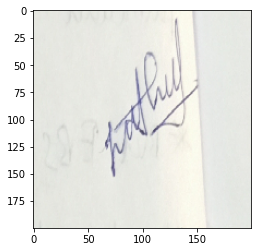

In [6]:
print("Testing a Sample Image : \n")
img = image.load_img('C:\\Users\\rithi\\Downloads\\Dhruvikaar-main\\Dhruvikaar-main\\DATASET\\DATASET\\testing\\valid\\test.jpg',target_size=(200,200))
plt.imshow(img)


X = image.img_to_array(img)
print(X)
X = np.expand_dims(X,axis=0)
val = model.predict([X])
if val == 1:
    print("\n Valid Signature")
else :
    print("\n Invalid Signature")
    
    

print("Saving the Model with name : \"new_model.h5\".\n")
model.save('new_model.h5')


In [7]:
def detect(text):
    IMAGE_PATH = 'C:\\Users\\rithi\\Downloads\\Dhruvikaar-main\\Dhruvikaar-main\\DATASET\\DATASET\\testing\\valid\\test2.jpg'
    reader = easyocr.Reader(['en'])
    result = reader.readtext(IMAGE_PATH,paragraph="False")
    result
    font = cv2.FONT_HERSHEY_SIMPLEX
    top_left = tuple(result[0][0][0])
    bottom_right = tuple(result[0][0][2])
    img = cv2.imread(IMAGE_PATH)
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,255),3)
    img = cv2.putText(img,text,bottom_right, font, 0.5,(255,0,0),2,cv2.LINE_AA)
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.show()

Loading the saved model from the file and testing.....

1/1 [==============================] - 0s 159ms/step


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


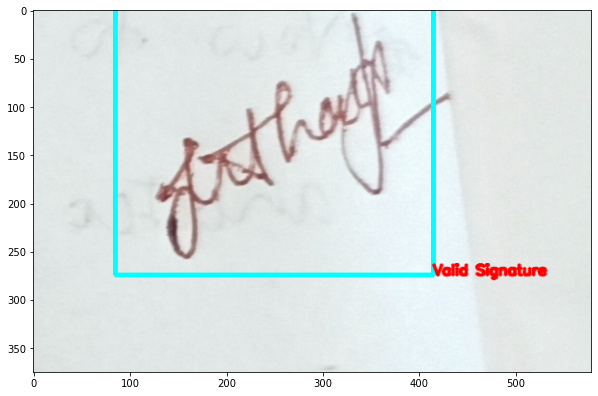

Valid Signature


In [8]:
print("Loading the saved model from the file and testing.....\n")
my_model=load_model('new_model.h5')

img = image.load_img('C:\\Users\\rithi\\Downloads\\Dhruvikaar-main\\Dhruvikaar-main\\DATASET\\DATASET\\testing\\valid\\test2.jpg',target_size=(200,200))
#plt.imshow(img)

X = image.img_to_array(img)
X = np.expand_dims(X,axis=0)
val = my_model.predict([X])
if val == 1:
    detect("Valid Signature")
    print("Valid Signature")
else :
    detect("Invalid Signature")